![](https://i.imgur.com/lwuKUD4.png)

# Part I: Introduction to Qiskit

### Solved by Abdiel Guerrero 💜

Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.problems import dj_problem_oracle

## I.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates. 

By default, states in qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. 

![](https://i.imgur.com/vVq3aQJ.png)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


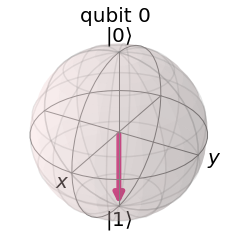

In [2]:
def lab1_ex1():
    qc = QuantumCircuit(1)
    qc.x(0)
    return qc

state = Statevector.from_instruction(lab1_ex1())
plot_bloch_multivector(state)

In [3]:
from qc_grader import grade_lab1_ex1

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex1(lab1_ex1())

Submitting your answer for lab1/ex1. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. 

![](https://i.imgur.com/eGFhg1g.png)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


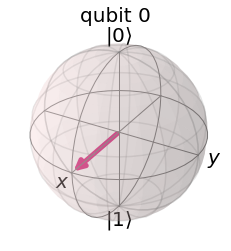

In [6]:
def lab1_ex2():
    qc = QuantumCircuit(1)
    qc.h(0)
    return qc

state = Statevector.from_instruction(lab1_ex2())
plot_bloch_multivector(state)

In [7]:
from qc_grader import grade_lab1_ex2

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex2(lab1_ex2())

Submitting your answer for lab1/ex2. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 3.) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

![](https://i.imgur.com/CzdvlOD.png)

Can you even come up with different ways?

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


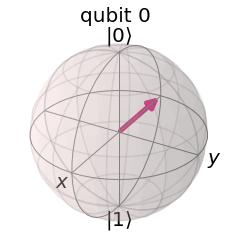

In [9]:
def lab1_ex3():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.z(0)
    return qc

state = Statevector.from_instruction(lab1_ex3())
plot_bloch_multivector(state)

In [10]:
from qc_grader import grade_lab1_ex3

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex3(lab1_ex3())

Submitting your answer for lab1/ex3. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. 

![](https://i.imgur.com/kjjW9hk.png)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


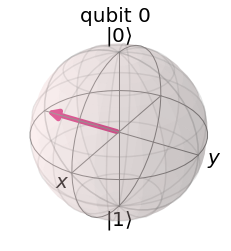

In [18]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    #Superposition
    qc.h(0)
    # rotation by -Pi/2 around the z-axis
    qc.sdg(0)
    return qc

state = Statevector.from_instruction(lab1_ex4())
plot_bloch_multivector(state)

In [19]:
from qc_grader import grade_lab1_ex4

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex4(lab1_ex4())

Submitting your answer for lab1/ex4. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## I.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html. The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate . As it has no effect applied on two qubits in state $|0\rangle$, we apply a Hadamard gate before to bring the control qubit in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. 
### 5.) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

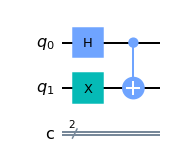

In [27]:
def lab1_ex5():
    qc = QuantumCircuit(2,2) # this time, we not only want two qubits, but also two classical bits for the measurement
    qc.h(0)
    qc.x(1)
    qc.cx(0,1)
    return qc

qc = lab1_ex5()
qc.draw() # we draw the circuit

In [28]:
from qc_grader import grade_lab1_ex5

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex5(lab1_ex5())

Submitting your answer for lab1/ex5. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Let us now also add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

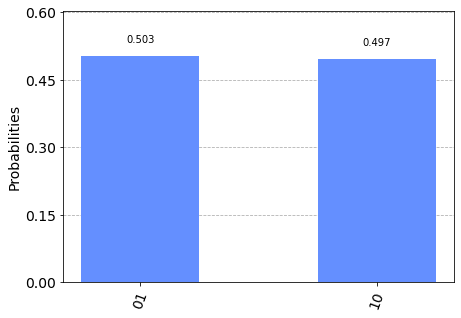

In [29]:
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

As you can see in the histogram, the only possible outputs are "01" and "10", so the states of the two qubits are always perfectly anti-correlated.

### 6.) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|010\rangle - |101 \rangle \right)$.
Hint: the following circuit constructs the GHZ state, $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$:

![](https://i.imgur.com/e0ShtoL.png)

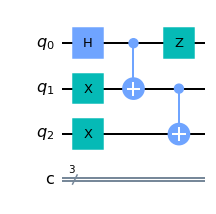

In [103]:
def lab1_ex6():
    qc = QuantumCircuit(3,3)
    qc.h(0)
    qc.x(1)
    qc.x(2)
    qc.cx(0,1)
    qc.z(0)
    qc.cx(1,2)  
    return qc


qc = lab1_ex6()
qc.draw() # we draw the circuit

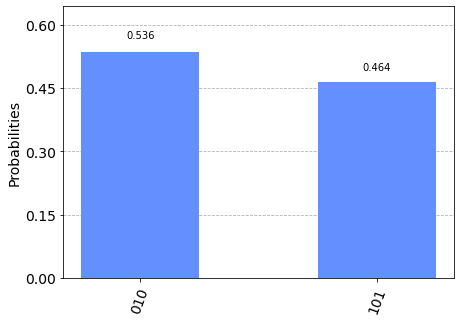

In [104]:
qc.measure(0, 0) 
qc.measure(1, 1) 
qc.measure(2, 2) 
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

In [105]:
from qc_grader import grade_lab1_ex6

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex6(lab1_ex6())

Submitting your answer for lab1/ex6. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Congratulations for finishing these introductory exercises! Hopefully, they got you more familiar with the Bloch sphere and basic quantum gates. Let us now apply this knowledge to the second part, where we construct our first quantum algorithm, the Deutsch-Jozsa algorithm.

# Part II: Oracles and the Deutsch-Jozsa algorithm

Many quantum algoritms revolve around the notion of so called $\textit{oracles}$. An oracle is a function that can be considered as a 'black box'. We generally want to find out specific properties of this function. We do this by asking questions to the oracle (*querying*). The query complexity is then defined as the minimum number of queries in order to find these properties.


To get familiar with the use of oracles we will now consider the Deutsch-Josza problem. We will see that the quantum solution has a drastically lower query complexity than its classical counterpart.


## II.1: Deutsch-Jozsa Problem <a id='djproblem'> </a>

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.

The Deutsch-Jozsa algorithm was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.


In the Deutsch-Josza problem you are given an unknown orcale. This is in Qiskit implemented by the function:

In [106]:
oraclenr = 4 # determines the oracle (can range from 1 to 5)
oracle = dj_problem_oracle(oraclenr) # gives one out of 5 oracles
oracle.name = "DJ-Oracle"

This function gives a certain oracle with 5 input qubits. **The last qubit ($q_4$) will be the output**. In order to get a feeling for the oracle, let us create a circuit to which we add the oracle such that we can pass it different input strings and then measure the output of $q_4$. This corresponds to the classical way of determining whether the oracle is balanced or constant.

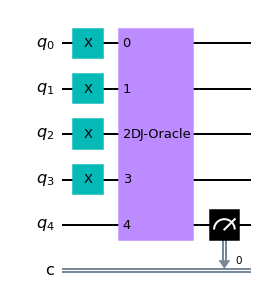

In [115]:
def dj_classical(n, input_str):
    
    # Build a Quantum Circuit with n qubits 
    # and 1 classical readout bit
    dj_circuit = QuantumCircuit(n+1,1)
    
    # Prepare/Encode the initial state corresponding to your input bit string
    # put a 1 if there is '1' in the i position of the bit string  
    for i in range(n):
        if input_str[i] == '1':
            dj_circuit.x(i)
    
    # append oracle
    dj_circuit.append(oracle, range(n+1))
    
    # measure the fourth qubit 
    dj_circuit.measure(n,0)
    
    return dj_circuit
    
n = 4 # number of qubits
input_str = '1111'
dj_circuit = dj_classical(n, input_str)
dj_circuit.draw() # draw the circuit

Now we simulate the results to find the outcome of this circuit. Try different input bit strings to see the corresponding outputs!

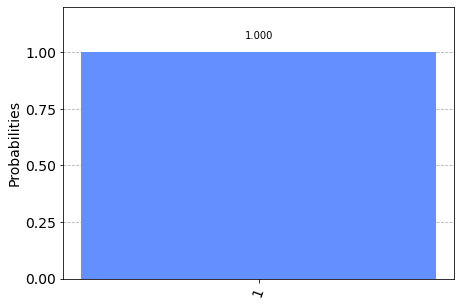

In [116]:
input_str = '1111'
dj_circuit = dj_classical(n, input_str)
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

Do you already have an idea whether the oracle is balanced or constant? How many inputs would you need to check minimally and maximally for this oracle?

In [140]:
def lab1_ex7():
    # Best case you inly check that there is a different value
    min_nr_inputs = 2
    # Worst case, half part, but to be certain we check 2^{n-1}+1 = 9
    max_nr_inputs = 9
    return [min_nr_inputs, max_nr_inputs]

In [141]:
from qc_grader import grade_lab1_ex7

# Note that the grading function is expecting a list of two integers
grade_lab1_ex7(lab1_ex7())

Submitting your answer for lab1/ex7. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## II.2: Quantum Solution to the Deutsch-Josza Problem

Using a quantum computer, we can find out if the oracle is constant or balanced with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below we will walk through the algorithm.

![](https://qiskit.org/textbook/ch-algorithms/images/deutsch_steps.png)

Prepare two quantum registers. The first is an $n$-qubit register initialised to $|0\rangle$, and the second is a one-qubit register initialised to $|-\rangle =\frac{1}{\sqrt{2}}\left(|0\rangle - |1 \rangle \right)$. Note, that with Qiskit states are described as $\vert b_3 b_2 b_1 b_0\rangle_{q_3q_2q_1q_0}$, i.e. just like for binary numbers, the last bit $b_0$ corresponds to the state of the first qubit. Thus, we want to initialize the state $$\vert \psi_0 \rangle = \vert -\rangle \otimes \vert0\rangle^{\otimes n}.$$

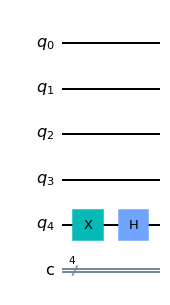

In [190]:
n=4
def psi_0(n):
    qc = QuantumCircuit(n+1,n)
    
    # Build the state (|00000 - |10000>)/sqrt(2)
    
    qc.x(4)
    qc.h(4)
    
    return qc

dj_circuit = psi_0(n)
dj_circuit.draw()

Applying the quantum bit oracle to any state $\vert x\rangle \vert y\rangle$ would yield the state $\vert x\rangle \vert y \oplus f(x)\rangle$.
As we have prepared the state $|y\rangle$, which corresponds to the state on the last qubit $q_n$, in the state $|-\rangle$, the output of the oracle for any input bitstring $x$ is given by:
$$ \frac{1}{\sqrt{2}}\vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) = \frac{1}{\sqrt{2}} (-1)^{f(x)}|x\rangle (|0\rangle - |1\rangle ) = (-1)^{f(x)}|x\rangle |-\rangle.$$
Thus, we have created a phase oracle acting on the bit string $x$.

Before applying the oracle, we need to create our input state on the first $n$ qubits though. For that we want an equal superposition state, so that the total state on all $n+1$ qubits is given by $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$ 

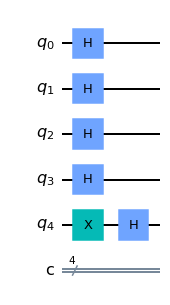

In [191]:
def psi_1(n):
    
    # obtain the |psi_0> = |00001> state
    qc = psi_0(n)
    
    # create the superposition state |psi_1>
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    
    return qc

dj_circuit = psi_1(n)
dj_circuit.draw()

Now we are ready to apply our oracle to the prepared superposition state $\vert \psi_1 \rangle$. This gives the state
$$ \vert \psi_2 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle (|0\rangle - |1\rangle ) = \frac{1}{\sqrt{2^{n}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle |-\rangle.$$

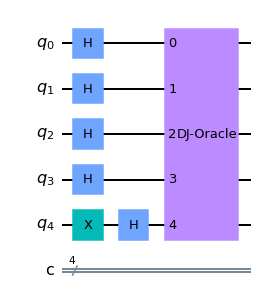

In [192]:
def psi_2(oracle,n):
    
    # circuit to obtain psi_1
    qc = psi_1(n)
    
    # append the oracle
    qc.append(oracle, range(n+1))
    
    return qc

dj_circuit = psi_2(oracle, n)
dj_circuit.draw()

In the final part of our algorithm we disregard the outcome on our second register and we apply an n-fold Hadamard to our first register. Afterwards we measure the outcome on these qubits.

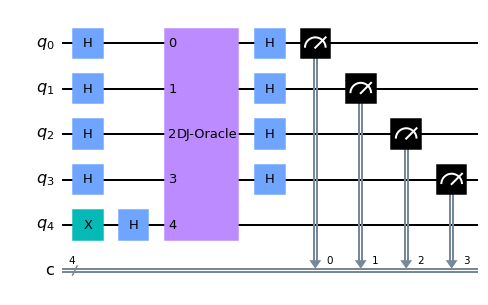

In [193]:
def lab1_ex8(oracle, n): 
# note that this exercise also depends on the code in the functions psi_0 (In [24]) and psi_1 (In [25])
    qc = psi_2(oracle, n)
    
    # apply n-fold hadamard gate
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
       
    # add the measurement by connecting qubits to classical bits\
    qc.measure(0,0)
    qc.measure(1,1)
    qc.measure(2,2)
    qc.measure(3,3)
    return qc

dj_circuit = lab1_ex8(oracle, n)
dj_circuit.draw()

In [194]:
from qc_grader import grade_lab1_ex8

# Note that the grading function is expecting a quantum circuit with measurements
grade_lab1_ex8(lab1_ex8(dj_problem_oracle(4),n))

Submitting your answer for lab1/ex8. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


At this point the second single qubit register may be ignored. Applying a Hadamard gate to each qubit in the first register yields the state:
        $$
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)+x \cdot y} \right]
                    \vert y \rangle,
        \end{aligned}
        $$
       
where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.

Let us now run the circuit including the measurement of the first register on the simulator:

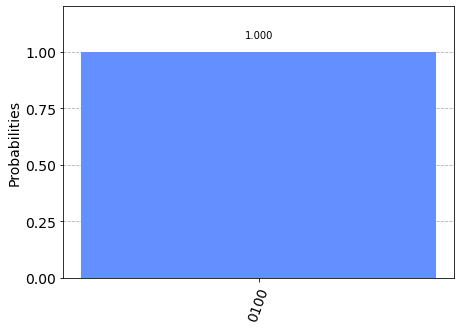

In [195]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

As we learnt in the lecture, if the output is the zero bit string, we know that the oracle is constant. If it is any other bit string, we know that it is balanced. You may also check the other oracles by just changing the oracle number in the beginning where the oracle is defined!